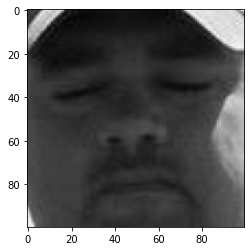

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/WRENCH/Desktop/Try-3/Test_Dataset"

CATEGORIES = ["Closed_Eye", "Open_Eye"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
import numpy
numpy.version.version

'1.19.2'

In [3]:
print(img_array)

[[ 83  76  69 ... 157 210 252]
 [ 71  69  77 ... 152 129 161]
 [ 61  67  73 ... 210 164  93]
 ...
 [229 237 172 ... 100 107 114]
 [232 236 212 ... 101 106 111]
 [235 231 238 ... 102 105 108]]


In [4]:
print(img_array.shape)

(100, 100)


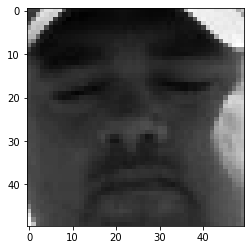

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 1231/1231 [00:00<00:00, 1379.10it/s]

2423


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
0
1
0
1
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 46]
   [ 44]
   [ 42]
   ...
   [ 33]
   [ 39]
   [ 45]]

  [[ 46]
   [ 44]
   [ 42]
   ...
   [ 35]
   [ 38]
   [ 38]]

  [[ 47]
   [ 45]
   [ 43]
   ...
   [ 31]
   [ 35]
   [ 36]]

  ...

  [[ 44]
   [ 45]
   [ 45]
   ...
   [108]
   [ 45]
   [ 33]]

  [[ 41]
   [ 42]
   [ 43]
   ...
   [ 99]
   [ 34]
   [ 31]]

  [[ 41]
   [ 42]
   [ 43]
   ...
   [ 92]
   [ 32]
   [ 28]]]]


In [10]:
np.save('features.npy',X)
np.save('label.npy',y)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


X = np.load('features.npy')
y = np.load('label.npy')

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
69/69 [==============================] - 8s 116ms/step - loss: 0.6683 - accuracy: 0.6115 - val_loss: 0.5768 - val_accuracy: 0.7490
Epoch 2/20
69/69 [==============================] - 8s 114ms/step - loss: 0.4948 - accuracy: 0.7794 - val_loss: 0.4064 - val_accuracy: 0.8313
Epoch 3/20
69/69 [==============================] - 8s 122ms/step - loss: 0.4234 - accuracy: 0.8083 - val_loss: 0.3818 - val_accuracy: 0.8395
Epoch 4/20
69/69 [==============================] - 9s 127ms/step - loss: 0.3332 - accuracy: 0.8624 - val_loss: 0.3372 - val_accuracy: 0.8519
Epoch 5/20
69/69 [==============================] - 9s 126ms/step - loss: 0.2728 - accuracy: 0.8922 - val_loss: 0.2626 - val_accuracy: 0.9095
Epoch 6/20
69/69 [==============================] - 9s 123ms/step - loss: 0.2254 - accuracy: 0.9078 - val_loss: 0.2492 - val_accuracy: 0.9095
Epoch 7/20
69/69 [==============================] - 9s 133ms/step - loss: 0.1842 - accuracy: 0.9275 - val_loss: 0.1935 - val_accuracy: 0.9218
Epoch 

In [12]:
model.save('CNN.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN.model\assets


In [13]:
CATEGORIES = ["Closed_Eye", "Open_Eye"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50 # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("CNN.model")

prediction = model.predict([prepare('closed_eye_0007.jpg_face_1.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Closed_Eye


In [14]:
prediction = model.predict([prepare('Ainsworth_Dyer_0001.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Open_Eye
